In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install geodatasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium

import geopandas as gpd
import geodatasets


Boston police district data: https://bostonopendata-boston.opendata.arcgis.com/datasets/9a3a8c427add450eaf45a470245680fc/explore

In [4]:
df_calendar = pd.read_csv('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/calendar.csv')

df_listings = pd.read_csv('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/listings.csv')

df_reviews = pd.read_csv('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/reviews.csv')

# **Info about the datasets**

In [5]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [8]:
df = df_listings.copy()

# **Data cleaning**

In [9]:
#Creating some new numerical columns
df['price_num'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['weekly_price_num'] = df['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['monthly_price_num'] = df['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
df['security_deposit_num'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
df['cleaning_fee_num'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)

# Descriptive statistics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3585.0,8.440875e+06,4.500787e+06,3.353000e+03,4.679319e+06,8.577620e+06,1.278953e+07,1.493346e+07
scrape_id,3585.0,2.016091e+13,0.000000e+00,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13
host_id,3585.0,2.492311e+07,2.292781e+07,4.240000e+03,6.103425e+06,1.928100e+07,3.622147e+07,9.385411e+07
host_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
host_total_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3585.0,4.234003e+01,2.440255e-02,4.223594e+01,4.232999e+01,4.234520e+01,4.235469e+01,4.238998e+01
longitude,3585.0,-7.108482e+01,3.156464e-02,-7.117179e+01,-7.110508e+01,-7.107843e+01,-7.106215e+01,-7.100010e+01
accommodates,3585.0,3.041283e+00,1.778929e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3571.0,1.221647e+00,5.014871e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


<ipython-input-11-9fecc3797358>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='price_num', hue=i, ax=ax[1])


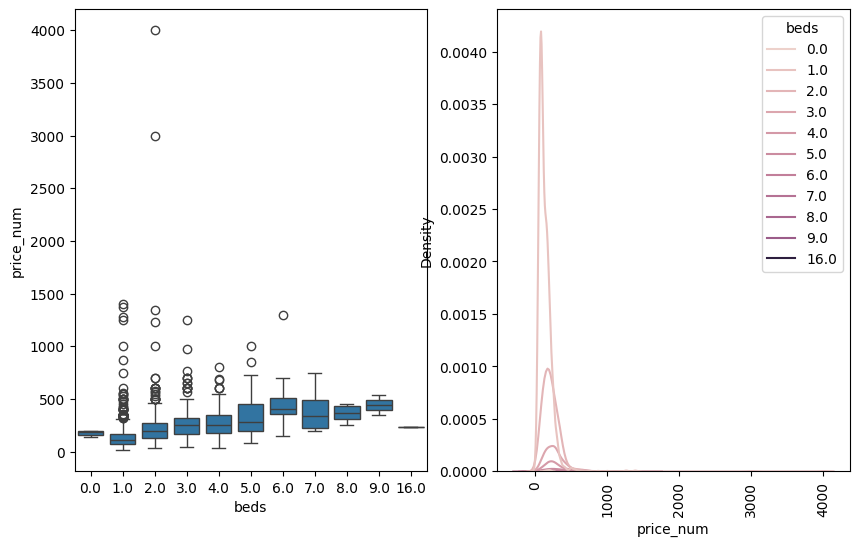

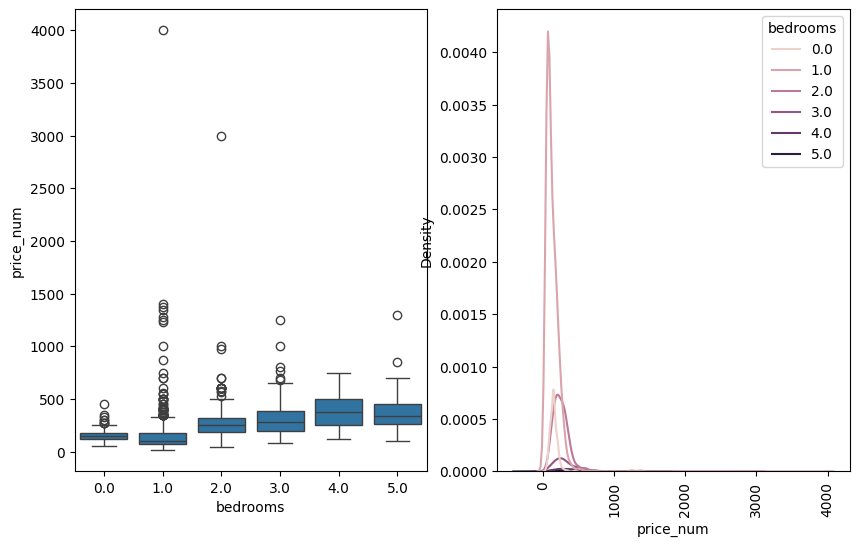

<ipython-input-11-9fecc3797358>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='price_num', hue=i, ax=ax[1])


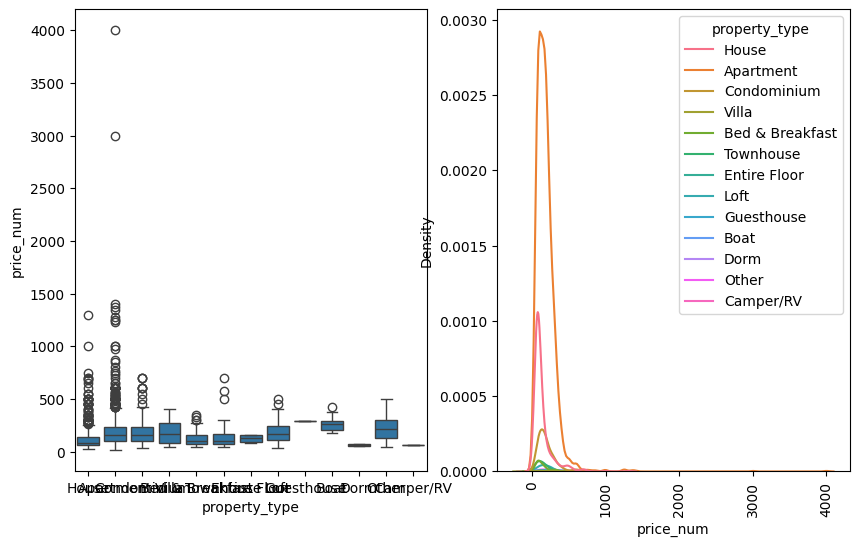

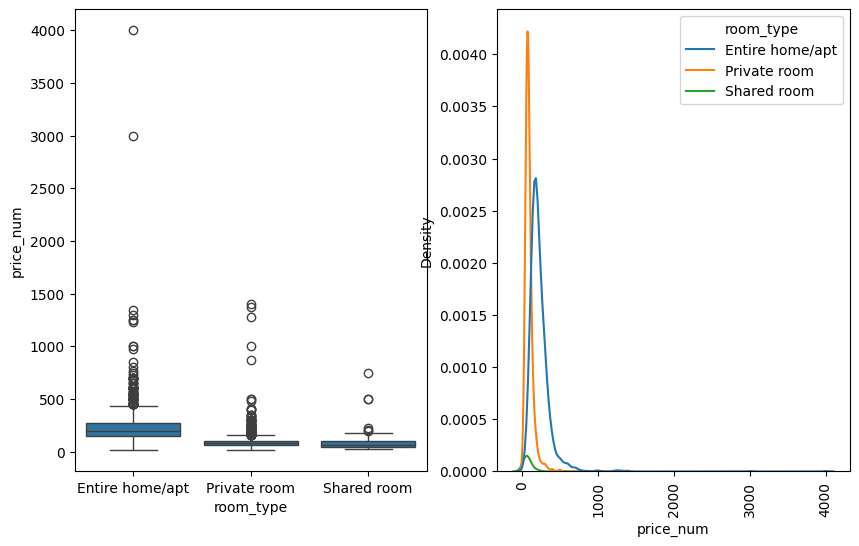

In [11]:
#'deep' Descriptive statistics

for i in ['beds', 'bedrooms', 'property_type', 'room_type']:
  fig, ax = plt.subplots(1,2,figsize=(10, 6))
  sns.boxplot(data=df, x=i, y='price_num', ax=ax[0])
  sns.kdeplot(data=df, x='price_num', hue=i, ax=ax[1])
  plt.xticks(rotation=90)

  plt.show()

There are a lot of price outliers! The distributions are skewed to the right



# Plotting the map to answer the question: **What is the distribution of rental prices across different neighborhoods in Boston?**

Ploting using **folium** library

In [12]:
#center of the map
boston_coords = [42.3601, -71.0589]
mapa = folium.Map(location=boston_coords, zoom_start=12)

#dividing the property locations into three categories
coord50 = df[df['monthly_price_num'] <= 2500]
coordenadas50 = set(zip(coord50['latitude'], coord50['longitude']))

coord100 = df[(df['monthly_price_num'] > 2500) & (df['price_num'] <= 5000)]
coordenadas100 = set(zip(coord100['latitude'], coord100['longitude']))

coord500 = df[df['monthly_price_num'] >= 5000]
coordenadas500 = set(zip(coord500['latitude'], coord500['longitude']))


#inserting on the map
for coord in coordenadas50:
    folium.Marker(location=coord, icon=folium.Icon(color='blue', icon='info-sign')).add_to(mapa)

#this category was omitted because it will be very hard to run
#for coord in coordenadas100:
    #folium.Marker(location=coord, icon=folium.Icon(color='green', icon='info-sign')).add_to(mapa)

for coord in coordenadas500:
    folium.Marker(location=coord, icon=folium.Icon(color='red', icon='info-sign')).add_to(mapa)

display(mapa)


Plotting the map using the **seabron scatterplot** library

<Axes: xlabel='longitude', ylabel='latitude'>

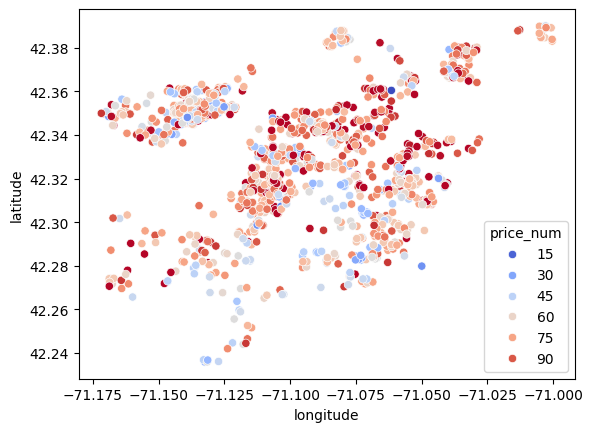

In [13]:
#location_point = df[(df['cleaning_fee_num'] <= 50) | (df['cleaning_fee_num'] > 200)]
location_point = df[(df['price_num'] <= 100)]

sns.scatterplot(x=location_point['longitude'], y=location_point['latitude'], hue=location_point['price_num'], palette=sns.color_palette("coolwarm", as_cmap=True))

Plotting the map using the **geopandas** library

In [14]:
#get the map data from shp file. See the link: https://bostonopendata-boston.opendata.arcgis.com/datasets/9a3a8c427add450eaf45a470245680fc/explore

gdf = gpd.read_file('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/Police_Districts.zip (Unzipped Files)/Police_Districts.shp')

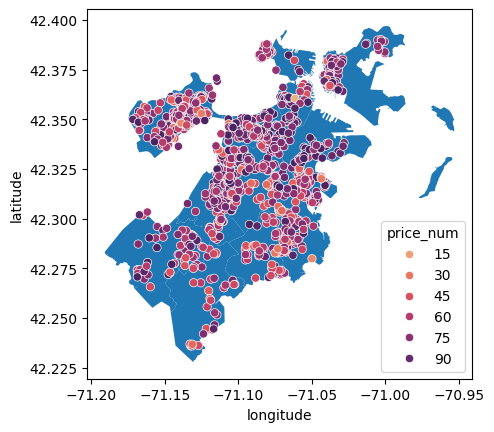

In [15]:
gdf.plot()
sns.scatterplot(x=location_point['longitude'], y=location_point['latitude'], hue=location_point['price_num'], palette=sns.color_palette("flare", as_cmap=True))
plt.show()

In [16]:
#Creation of a data set for locations and prices in three categories

price_cat = []
for i in df['price_num']:
  price_cat.append('< 100' if i < 100 else '> 350' if i > 350 else '100-350')

df_map = pd.concat([df[['latitude', 'longitude']], pd.Series(price_cat, name='price_cat')], axis=1)

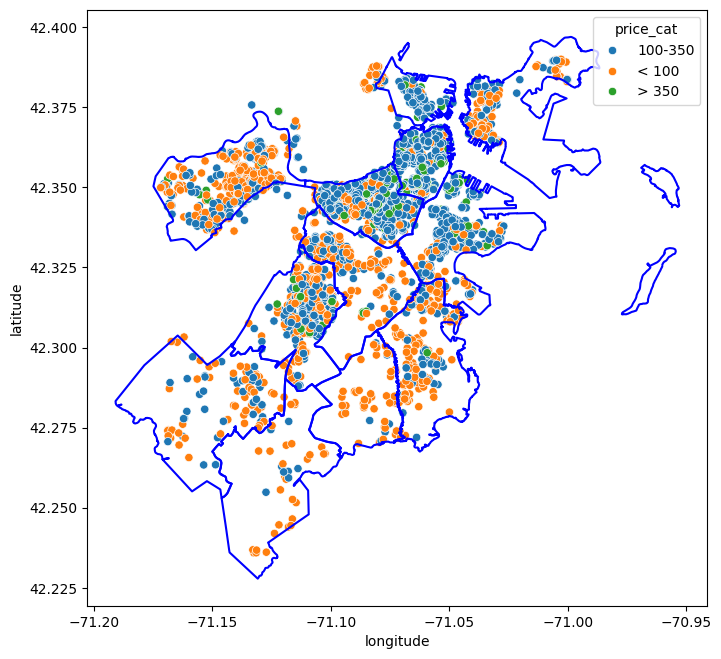

In [17]:
#plot the locations on the Boston map

gdf.boundary.plot(figsize=(8, 8), color='blue') #geopandas
sns.scatterplot(x=df_map['longitude'], y=df_map['latitude'], hue=df_map['price_cat']) #seaborn
plt.show()

Selection of geopandas and figure enhancement

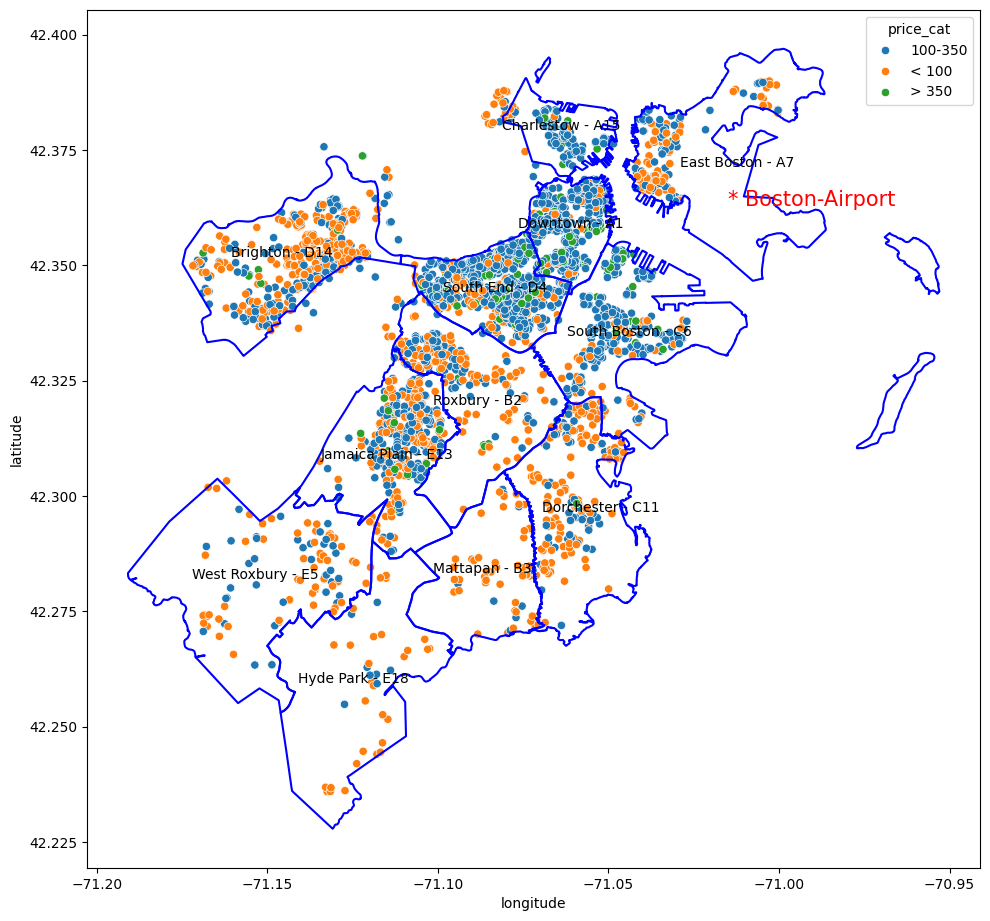

In [18]:
#plotting detailed map

districts ={
    'A1': 'Downtown - A1',
    'A15': 'Charlestow - A15',
    'A7': 'East Boston - A7',
    'B2': 'Roxbury - B2',
    'B3': 'Mattapan - B3',
    'C6': 'South Boston - C6',
    'C11': 'Dorchester - C11',
    'D4': 'South End - D4',
    'D14': 'Brighton - D14',
    'E5': 'West Roxbury - E5',
    'E13': 'Jamaica Plain - E13',
    'E18': 'Hyde Park - E18'
}
gdf['names'] = gdf['DISTRICT'].map(districts)

# Plot the boundaries
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='blue')

# Annotate the plot with region names
for idx, row in gdf.iterrows():
    plt.annotate(text=row['names'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=10, color='black')

sns.scatterplot(x=df_map['longitude'], y=df_map['latitude'], hue=df_map['price_cat'])

plt.text(-71.015, 42.363, '* Boston-Airport', fontdict=dict(fontsize=15, color='red'))

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/price_X_location.jpg', format='jpg', dpi=600)

plt.show()



# **Groupby method** to answer the question: **How do rental prices vary by property type (e.g., apartment, house, condo)**

In [19]:
#defining a function to calculate RSD (relative standar deviation)
def RSD(x):
  return round(x.std()/x.mean()*100, 0)

In [20]:
property_type_group = df.groupby('property_type')['price_num'].agg(['mean', 'std', 'min', 'max',
                                                                    'count', RSD]).round(1).sort_values(by='mean', ascending=False).reset_index()

In [21]:
property_type_group

,property_type,mean,std,min,max,count,RSD
0,Guesthouse,289.0,NaN,289.0,289.0,1,NaN
1,Boat,268.8,77.8,175.0,425.0,12,29.0
2,Other,229.9,143.4,40.0,500.0,17,62.0
3,Condominium,190.2,122.2,30.0,700.0,231,64.0
4,Villa,189.5,142.1,40.0,400.0,6,75.0
5,Loft,185.4,104.0,30.0,500.0,39,56.0
6,Apartment,182.0,154.3,10.0,4000.0,2612,85.0
7,Townhouse,149.0,126.2,44.0,700.0,54,85.0
8,House,131.6,131.1,20.0,1300.0,562,100.0
9,Bed & Breakfast,129.4,79.1,44.0,350.0,41,61.0


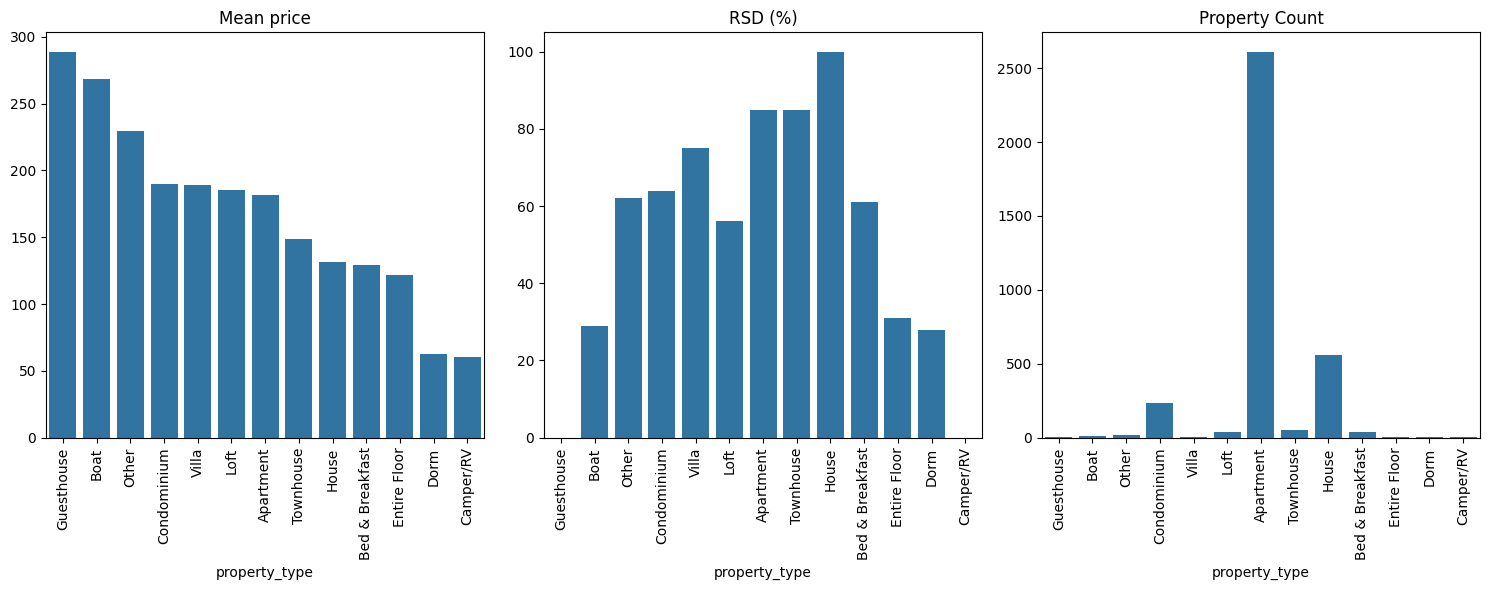

In [22]:
#plotting a bar chart for selected statistic

fig, ax, = plt.subplots(1,3,figsize=(15, 6))
a=0
for i in ['mean', 'RSD', 'count']:
  sns.barplot(data=property_type_group, x='property_type', y=i, ax=ax[a])
  ax[a].tick_params(axis='x', rotation=90)
  a+=1

ax[0].set_title('Mean price')
ax[1].set_title('RSD (%)')
ax[2].set_title('Property Count')


ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/price_X_property_bar.jpg', format='jpg', dpi=600)


plt.show()

In [23]:
#groupby + aggregation to room_type upon price_num
#the aggregation was a set of statistics metrics
room_type_group = df.groupby('room_type')['price_num'].agg(['mean', 'std', 'min', 'max', RSD]).round(1).sort_values(by='mean', ascending=False).reset_index()

In [24]:
room_type_group

,room_type,mean,std,min,max,RSD
0,Entire home/apt,227.4,157.9,11.0,4000.0,69.0
1,Private room,96.0,85.1,10.0,1400.0,89.0
2,Shared room,92.8,108.7,20.0,750.0,117.0


In [25]:
beds_group = df.groupby('beds')['price_num'].agg(['mean', 'std', 'min', 'max', 'count', RSD]).round(1).sort_values(by='mean', ascending=False).reset_index()

In [26]:
beds_group

,beds,mean,std,min,max,count,RSD
0,6.0,464.9,266.1,150.0,1300.0,16,57.0
1,9.0,443.0,131.5,350.0,536.0,2,30.0
2,7.0,378.5,190.7,199.0,750.0,8,50.0
3,8.0,362.3,82.6,250.0,450.0,6,23.0
4,5.0,351.4,213.3,80.0,1000.0,40,61.0
5,4.0,278.9,147.7,35.0,800.0,106,53.0
6,3.0,266.7,150.7,40.0,1250.0,275,57.0
7,16.0,229.0,NaN,229.0,229.0,1,NaN
8,2.0,216.2,191.3,35.0,4000.0,953,89.0
9,0.0,176.2,28.8,139.0,199.0,4,16.0


# Using the calendar dataset to answer: **Are there any identifiable trends or seasonal patterns in booking rates over time?**

In [27]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [28]:
df_calendar['available'].value_counts()

available
f    665853
t    643037
Name: count, dtype: int64

In [29]:
df_calendar['date_month'] = pd.to_datetime(df_calendar['date']).dt.month

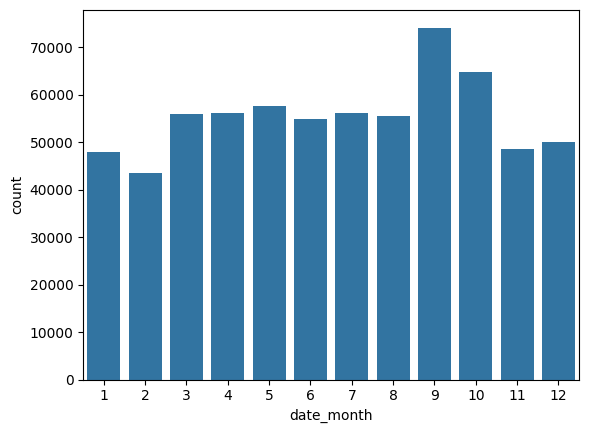

In [30]:
sns.barplot(df_calendar[df_calendar['available'] == 'f']['date_month'].value_counts())
plt.xticks(rotation=0)
plt.show()

In [31]:
#selectin only the avaliable (t) property
df_calendar_available = pd.DataFrame()
df_calendar_available = df_calendar[df_calendar['available'] == 't']

In [32]:
#clean simbols and transform it as a number
df_calendar_available.loc[:, 'price_num'] = df_calendar_available['price'].str.replace('$', '').str.replace(',','').astype(float)

<ipython-input-32-c136a102dc5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_available.loc[:, 'price_num'] = df_calendar_available['price'].str.replace('$', '').str.replace(',','').astype(float)


In [33]:
#Using the groupby method
df_calendar_available_group = df_calendar_available.groupby(df_calendar_available[
    'date_month'])['price_num'].agg(['mean','std', 'min', 'max', 'count', RSD]).round(1).sort_values(by='mean', ascending=False).reset_index()

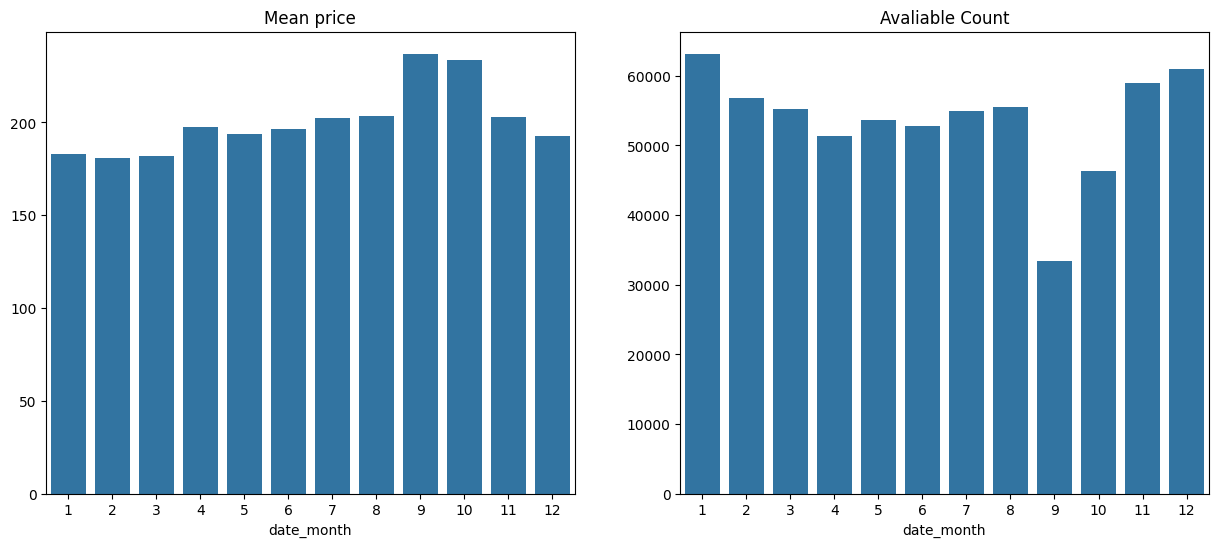

In [34]:
#plot the bar chart
fig, ax, = plt.subplots(1,2,figsize=(15, 6))
a=0
for i in ['mean', 'count']:
  sns.barplot(data=df_calendar_available_group, x='date_month', y=i, ax=ax[a])
  ax[a].tick_params(axis='x', rotation=0)
  a+=1

ax[0].set_title('Mean price')
ax[1].set_title('Avaliable Count')


ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.savefig('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/price_X_avaliable.jpg', format='jpg', dpi=600)


plt.show()

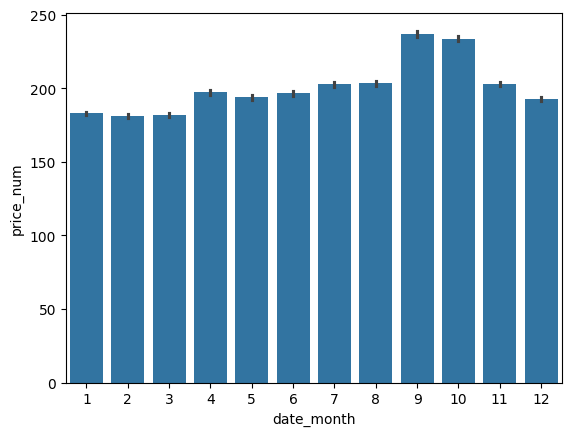

In [35]:
sns.barplot(data=df_calendar_available, x='date_month', y='price_num')
plt.show()

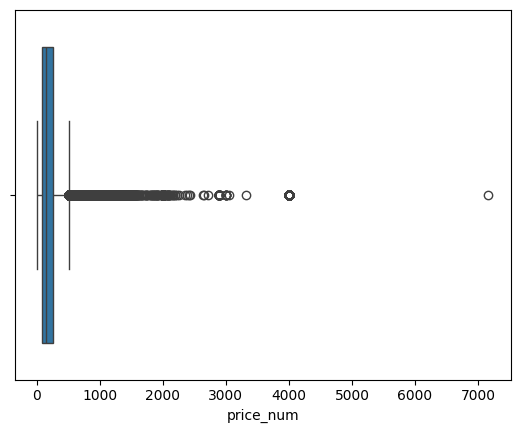

In [36]:
sns.boxplot(data=df_calendar_available, x='price_num')
plt.show()

In [37]:
#wath is the calendar time-mindow?
pd.to_datetime(df_calendar_available['date']).max() - pd.to_datetime(df_calendar_available['date']).min()

Timedelta('364 days 00:00:00')